## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

For taking a sample from a population, we need to see the following:

    Define the population we are studying.
    Draw a representative sample from that population.
    Use analyses that incorporate the sampling error.


Our population comprise of:

    flights: The departure and arrival information about flights in US in years 2018 and 2019.
    fuel_comsumption: The fuel comsumption of different airlines from years 2015-2019 aggregated per month.
    passengers: The passenger totals on different routes from years 2015-2019 aggregated per month.
    

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [1]:
# package with hypothesis tests
import scipy.stats as st

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### H0: mean_delay=0; Ha: mean_dealy !=0

In [5]:
df=pd.read_csv('flights_sample.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

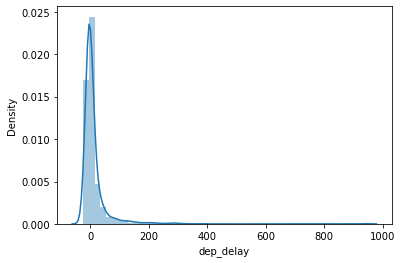

In [7]:
%matplotlib inline
sns.distplot(df.dep_delay)

In [8]:
print("Highest allowed (if normal)",df['dep_delay'].mean() + 3*df['dep_delay'].std())
print("Lowest allowed (if normal)",df['dep_delay'].mean() - 3*df['dep_delay'].std())

Highest allowed (if normal) 161.55043167291484
Lowest allowed (if normal) -138.45674531853604


In [9]:
st.ttest_1samp(df.dep_delay,0,nan_policy='omit')

Ttest_1sampResult(statistic=7.236667478082963, pvalue=9.267349525908236e-13)

Since the p-value is very small and close to 0 the mean of the sample is not equal to 0, hence delays are not from a normal distribution.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [10]:
df.fl_date.head(2)

0    2019-03-28
1    2018-06-02
Name: fl_date, dtype: object

In [12]:
df['fl_date']=pd.to_datetime(df.fl_date, format='%Y-%m-%d')    

In [13]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month

Text(0, 0.5, 'Mean delay')

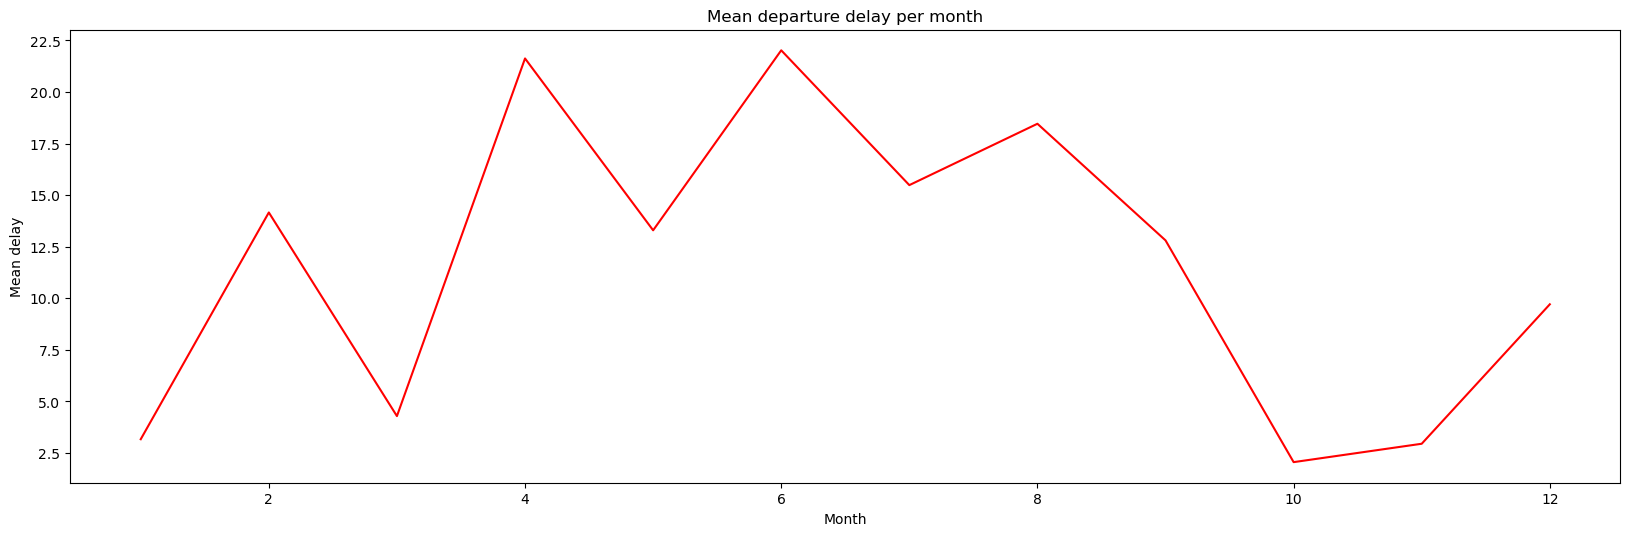

In [14]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['dep_delay'].groupby(df.month).mean(),'-r')
plt.title('Mean departure delay per month')
plt.xlabel('Month')
plt.ylabel('Mean delay')

Months June, April, Aug experience the most delays, cannot think of the reason.

Text(0, 0.5, 'Median delay')

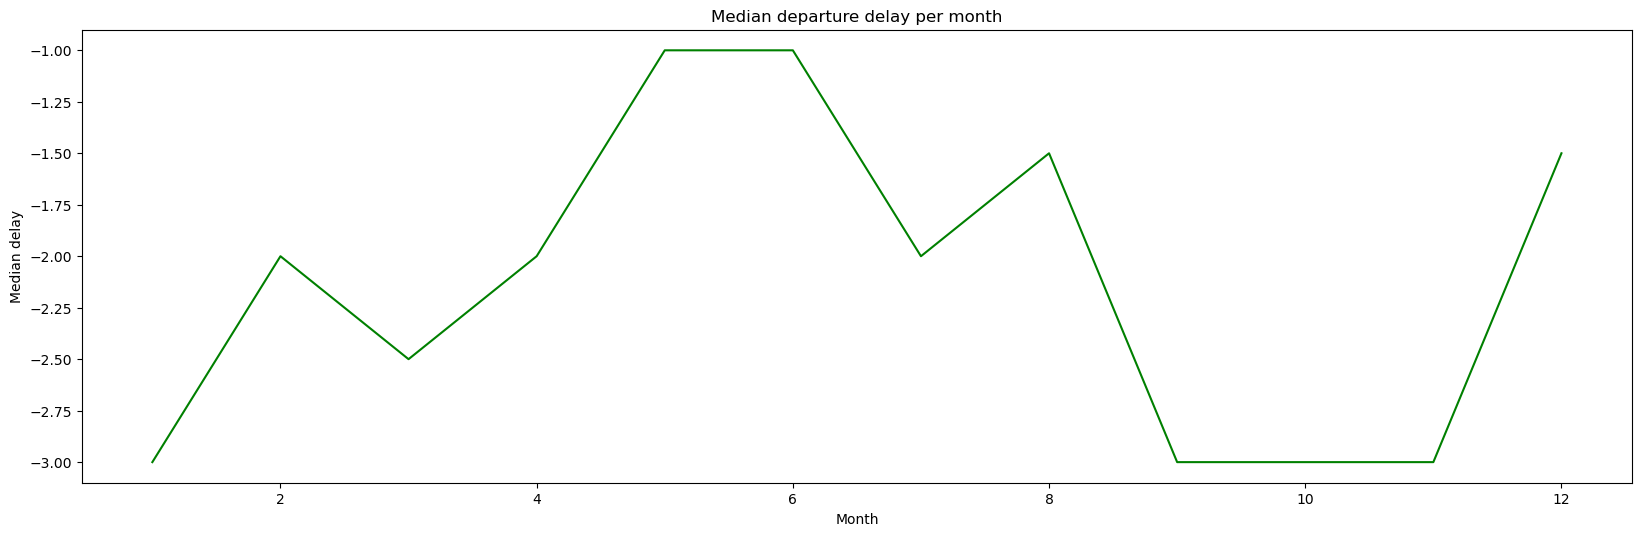

In [15]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['dep_delay'].groupby(df.month).median(),'-g')
plt.title('Median departure delay per month')
plt.xlabel('Month')
plt.ylabel('Median delay')

Median delay in negative tells us that the flights departed earlier 1 to 3 mins.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?